C:\Users\91758\AppData\Local\Temp\ipykernel_23012\2656646535.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(train_images_umap[:, 0], train_images_umap[:, 1], c=train_labels, cmap=plt.cm.get_cmap("jet", 10))


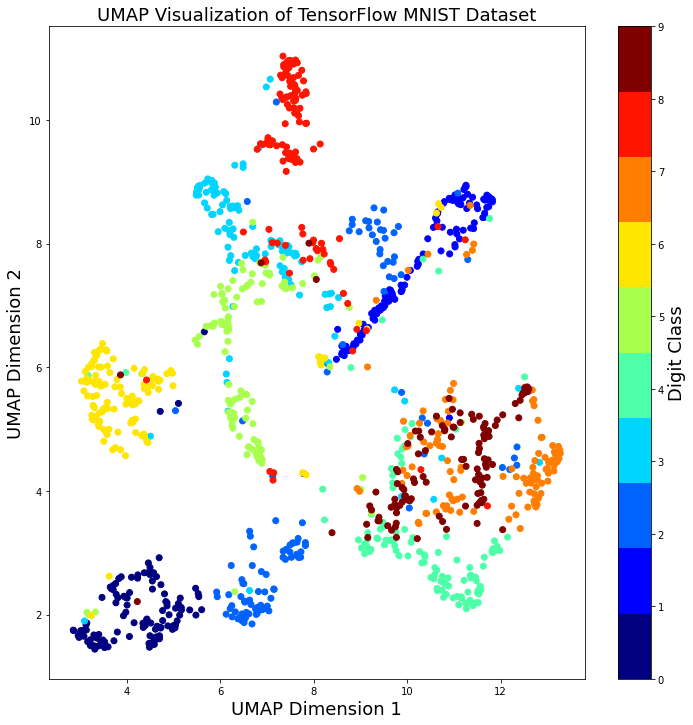

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image, ImageOps
import umap
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

# Select a subset of images (120 images per class)
num_per_class = 120
selected_indices = []
for class_label in range(10):
    class_indices = np.where(train_labels == class_label)[0]
    selected_indices.extend(class_indices[:num_per_class])

train_images = train_images[selected_indices]
train_labels = train_labels[selected_indices]

# Convert images to grayscale and resize
image_width, image_height = 256, 256
num_train_images = train_images.shape[0]
resized_images = np.zeros((num_train_images, image_height, image_width), dtype=np.uint8)
for i in range(num_train_images):
    train_image = Image.fromarray(train_images[i], mode="L")
    train_image = ImageOps.fit(train_image, (image_width, image_height), method=Image.LANCZOS)
    resized_images[i] = np.array(train_image)

# Normalize the pixel values to the range [0, 1]
train_images_normalized = resized_images.astype(np.float32) / 255.0

# Flatten the images
train_images_flattened = train_images_normalized.reshape(train_images_normalized.shape[0], -1)

# Perform UMAP
n_components = 2  # Number of components for visualization
umap_model = umap.UMAP(n_components=n_components,random_state=42)
train_images_umap = umap_model.fit_transform(train_images_flattened)

# Visualize the results
# plt.figure(figsize=(12, 12))
# plt.scatter(train_images_umap[:, 0], train_images_umap[:, 1], c=train_labels, cmap=plt.cm.get_cmap("jet", 10))
# plt.colorbar(ticks=range(10))
# plt.title("UMAP Visualization of TensorFlow MNIST Dataset")
# plt.show()
plt.figure(figsize=(12, 12))
scatter = plt.scatter(train_images_umap[:, 0], train_images_umap[:, 1], c=train_labels, cmap=plt.cm.get_cmap("jet", 10))
colorbar = plt.colorbar(scatter, ticks=range(10), label='Digit Class')
colorbar.ax.yaxis.label.set_fontsize(18)  # Set font size for colorbar label
plt.title("UMAP Visualization of TensorFlow MNIST Dataset", fontsize=18)
plt.xlabel("UMAP Dimension 1", fontsize=18)
plt.ylabel("UMAP Dimension 2", fontsize=18)
plt.show()